## Handwritten digit Classification

We will be dealing with the MNIST dataset which contains 48,000 images of handwritten digits from zero to nine. The images are of 28x28 size and are grayscale(for the ease of calcualation). 
The files are in csv format with the first collumn being the label and the other 784 collumns being the pixel value

For testing we will define a function that takes user input of a handwritten image and then predicts the digit written in that image.

##### Let us start by importing the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras import *
import warnings
warnings.filterwarnings('ignore')
import cv2
import keras

In [4]:
train = pd.read_csv('D:/Sohum/train.csv')

In [5]:
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]

In [6]:
print(X_train.shape)

(42000, 784)


The images look something like this:
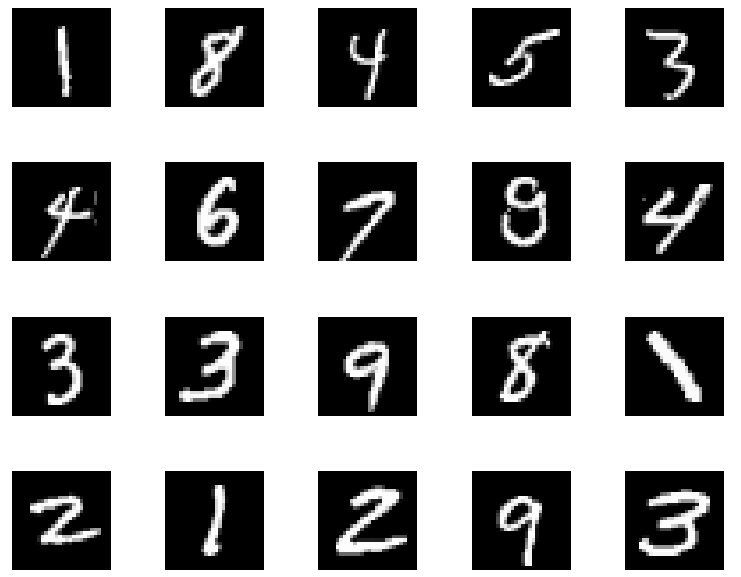


X_train variable will now have the pixel values whilst the Y_train variable will have the labels for each of the images 


In [7]:
# We need to scale the images to [0,1] range
X_train = (X_train.astype("float32").values.reshape(-1,28,28,1))/255.0

In [8]:
#We need to convert the class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train.values)

#### We will now build our neural network model

In [9]:
model = Sequential()

model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))

model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32,(5,5),activation = 'relu', input_shape=(28,28,1)))

model.add(Convolution2D(64,(5,5),activation = 'relu'))
model.add(Flatten())
#This defines the neural network
#The number defines the number of output neurons that we will need

model.add(Dense(40,activation='relu'))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          51264     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

To make our model robust, we need to augment our data. We will apply changes to our current training dataset and distort it a little bit so that the model doesn't overfit.

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    shear_range = 0.1, 
)
datagen.fit(X_train)

In [11]:

model.compile(metrics = ["accuracy"],loss = 'categorical_crossentropy',
              optimizer = 'adamax')

Let us fit our model to the dataset

In [12]:
with tf.device('/device:gpu:0'):
    hist = model.fit(X_train,Y_train,epochs = 20,
                     shuffle = True,validation_split = 0.1,batch_size = 128)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 14s 374us/step - loss: 0.2880 - accuracy: 0.9092 - val_loss: 0.1204 - val_accuracy: 0.9629
Epoch 2/20
37800/37800 [==============================] - 9s 251us/step - loss: 0.0743 - accuracy: 0.9766 - val_loss: 0.0772 - val_accuracy: 0.9798
Epoch 3/20
37800/37800 [==============================] - 9s 243us/step - loss: 0.0519 - accuracy: 0.9843 - val_loss: 0.0465 - val_accuracy: 0.9857
Epoch 4/20
37800/37800 [==============================] - 9s 250us/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0383 - val_accuracy: 0.9871
Epoch 5/20
37800/37800 [==============================] - 9s 246us/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.0456 - val_accuracy: 0.9855
Epoch 6/20
37800/37800 [==============================] - 9s 248us/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0383 - val_accuracy: 0.9879
Epoch 7/20
37800/37800 [==============================] - 9s 2

In [75]:
"""test = pd.read_csv('D:/Sohum/test.csv')
test = test.iloc[:10,:]
test.to_csv("D:/Sohum/MNIST Images/test_min.csv")"""

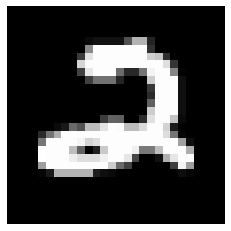

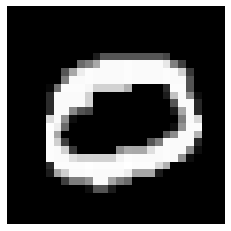

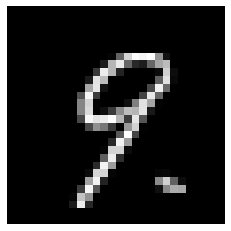

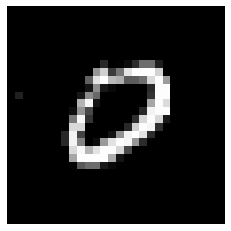

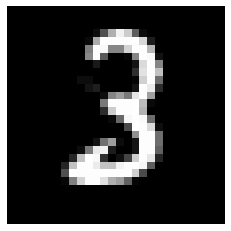

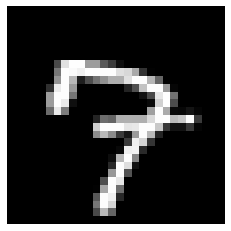

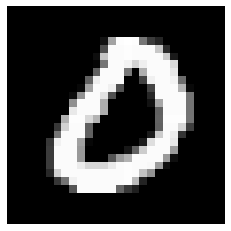

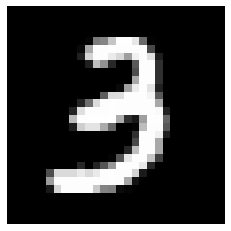

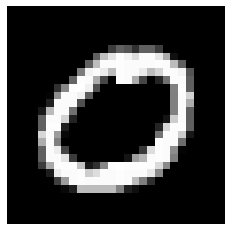

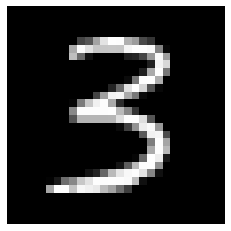

In [73]:
"""test = (test.astype(np.float32).values.reshape(-1,28,28))/255.0
for i in range(test.shape[0]):
    plt.imshow(test[i,:],cmap='binary_r')
    plt.axis("off")
    plt.savefig("D:/Sohum/MNIST Images/{}.png".format(i))
    plt.show()"""

In [10]:
"""pred = model.predict(grey)
pred1 = np_utils.to_categorical(pred)
pred1 = np.argmax(pred,axis = 1)
print(pred1)"""

'pred = model.predict(grey)\npred1 = np_utils.to_categorical(pred)\npred1 = np.argmax(pred,axis = 1)\nprint(pred1)'

In [37]:
test = pd.read_csv('D:/Sohum/MNIST Images/test_min.csv')
test = test.iloc[:,1:]

In [38]:
test1 = test.values
test = (test.astype(np.float32).values.reshape(-1,28,28))/255.0
test1 = test1.reshape(-1,28,28,1)/255.0
pred = model.predict(test1)
pred1 = np_utils.to_categorical(pred)
pred1 = np.argmax(pred,axis = 1)


2


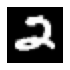

0


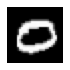

9


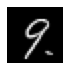

9


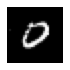

3


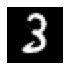

7


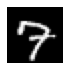

0


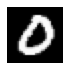

3


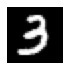

0


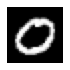

3


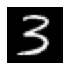

In [52]:
for i in range(test.shape[0]):
    fig = plt.figure(figsize=(1,2))
    plt.imshow(test[i,:],cmap='binary_r')
    print(pred1[i])
    plt.axis("off")
    plt.show()
